<a href="https://colab.research.google.com/github/rimjhimkhanna09/BankNoteAuthenticationK-MeansClustering/blob/main/BankNoteAuthenticationKmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#load data
df = pd.read_csv('data_with_labels.csv')
df = pd.read_csv('data_with_labels.csv')


Data Assessing

In [2]:
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
df.shape

(1372, 5)

In [5]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df[df.duplicated()].shape[0]

24

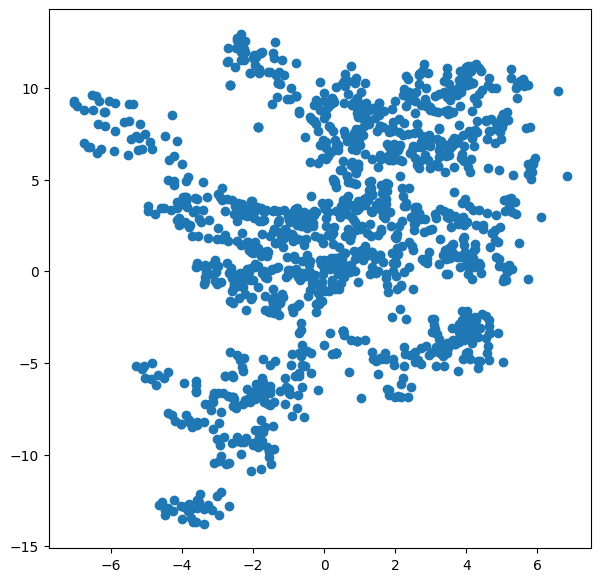

In [8]:
plt.figure(figsize = [7, 7])
plt.scatter(df.V1, df.V2);

K Means Clustering

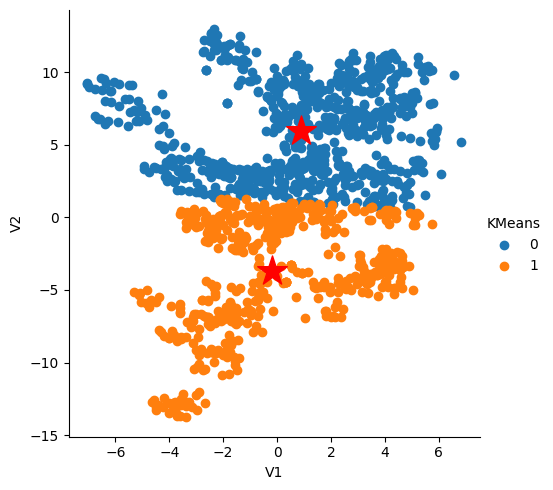

In [9]:
#!pip install scikit-learn
from sklearn.cluster import KMeans
data = np.column_stack(( df.V1, df.V2))  # we use only V1 and V2

# compute K-Means
km_res = KMeans(n_clusters = 2).fit(data)
clusters = km_res.cluster_centers_

# put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

#plot out the result
g = sb.FacetGrid(data = df, hue = 'KMeans', height = 5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

To make sure the K-Means model is stable in this dataset. We run it several time to see if we get similar results.

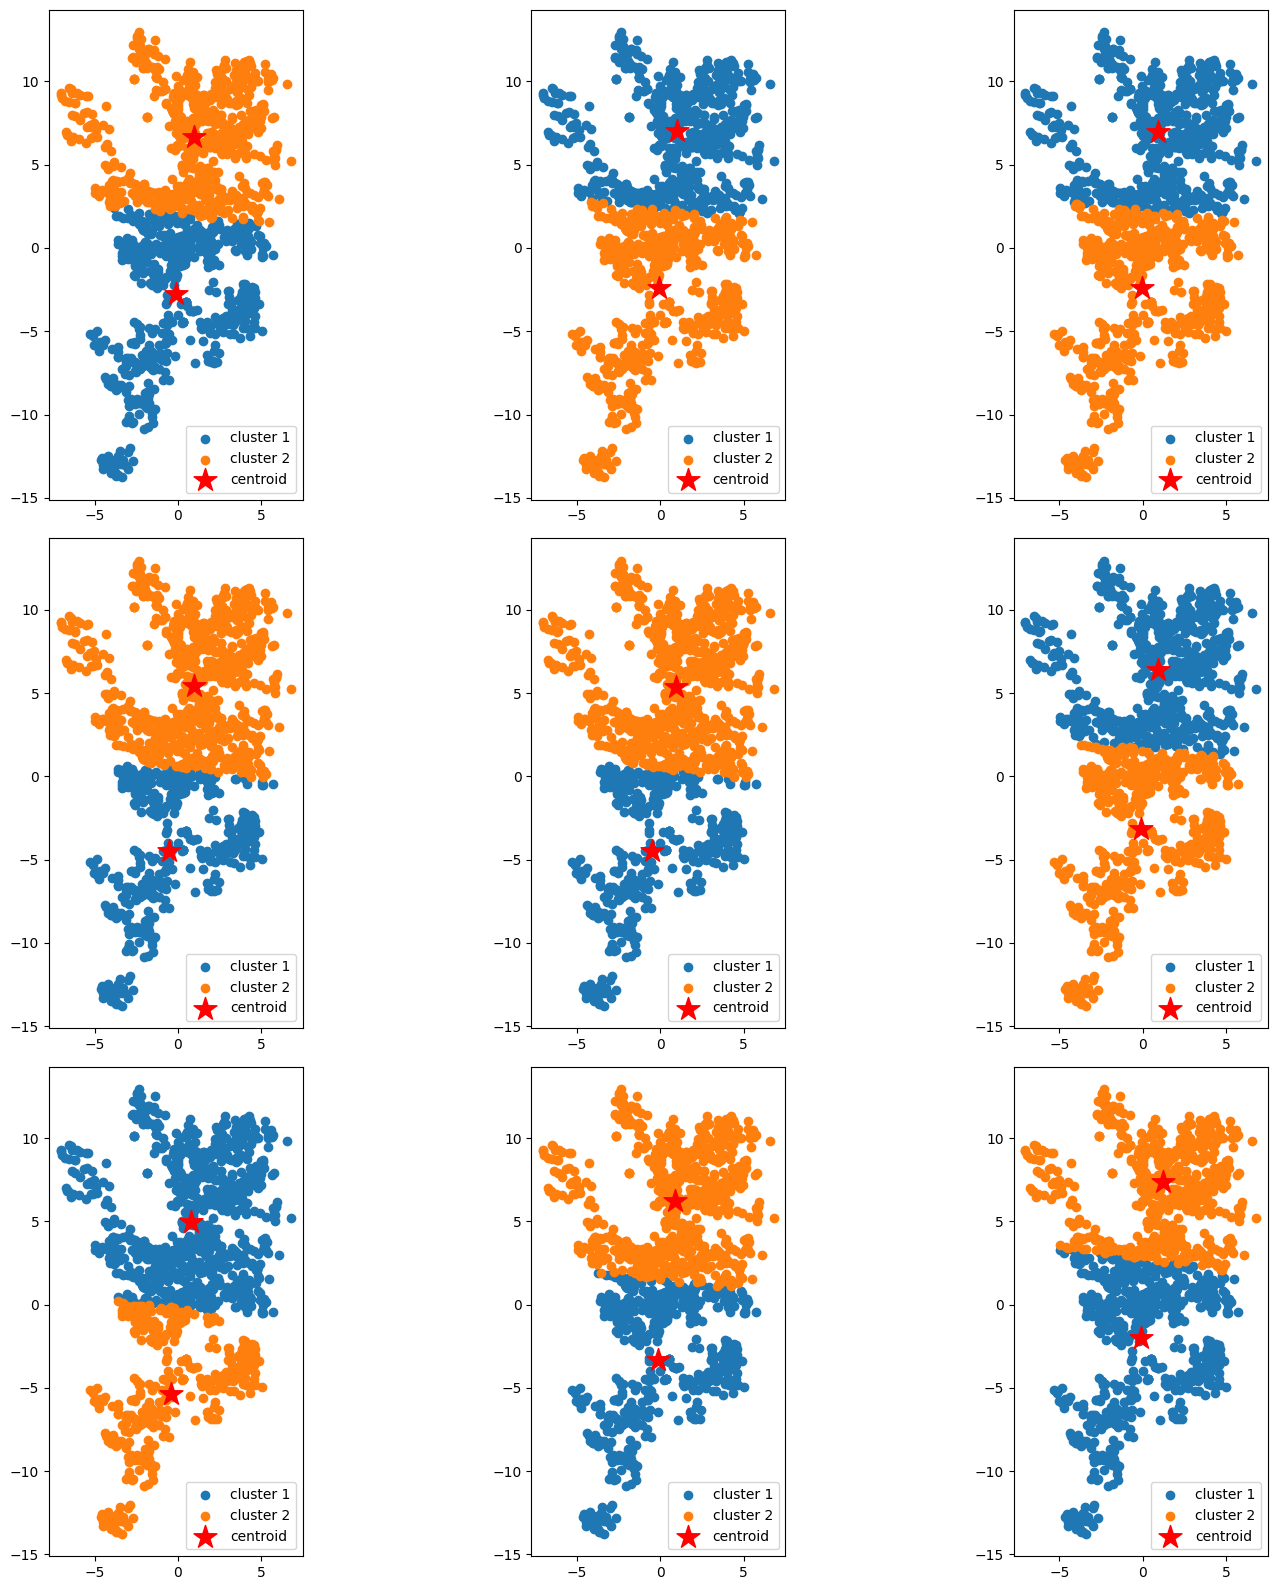

In [10]:
#from sklearn.cluster import KMeans, SpectralClustering

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = KMeans(n_clusters=2,
                max_iter=3)
    km.fit(data)
    centroids = km.cluster_centers_
    centers.append(centroids)
    ax[i].scatter(data[km.labels_ == 0, 0], data[km.labels_ == 0, 1],
                   label='cluster 1')
    ax[i].scatter(data[km.labels_ == 1, 0], data[km.labels_ == 1, 1],
                   label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].legend(loc='lower right')
    ax[i].set_aspect('equal')
plt.tight_layout();



    After running K-Means for 9 times, the results we got are very similar, which means the K-Means here is stable.

Analyze the K-Means computing results

In [11]:
km_res.cluster_centers_

array([[ 0.88705643,  5.94561166],
       [-0.19838275, -3.68774038]])

In [12]:
df['KMeans'] = km_res.labels_
df.groupby('KMeans').describe()

V1                                                           \
        count      mean       std     min       25%      50%       75%   
KMeans                                                                   
0       798.0  0.889609  2.900172 -7.0421 -0.944818  1.13945  3.233900   
1       574.0 -0.200040  2.635340 -5.2943 -2.220625 -0.71681  1.924675   

                   V2                                                  \
           max  count      mean       std       min       25%     50%   
KMeans                                                                  
0       6.8248  798.0  5.951439  3.171218   0.68906  3.129750  6.0371   
1       5.7403  574.0 -3.679059  3.793505 -13.77310 -6.409575 -3.2633   

                              V3                                        \
             75%      max  count      mean       std     min       25%   
KMeans                                                                   
0       8.725600  12.9516  798.0 -0.968926  2.370548 -5.2861 -2.956825   
1      -0.174348   1.2954  574.0  4.687714  4.241166 -2.3506  1.491650   

                                        V4                              \
             50%       75%      max  count      mean       std     min   
KMeans                                                                   
0      -0.858415  0.658405   7.7618  798.0 -2.059808  2.248081 -8.5482   
1       3.828950  7.714500  17.9274  574.0  0.015286  1.011643 -3.3202   

                                              Class                           \
             25%       50%       75%     max  count      mean       std  min   
KMeans                                                                         
0      -3.805775 -1.655400 -0.300870  2.1547  798.0  1.319549  0.466594  1.0   
1      -0.546235  0.097399  0.731015  2.4495  574.0  1.618467  0.486187  1.0   

                            
        25%  50%  75%  max  
KMeans                      
0       1.0  1.0  2.0  2.0  
1       1.0  2.0  2.0  2.0


Results:

    There are ~600 data being clustered in group 0, and ~77 data being clustering in group 1.
    For group 1, V1's mean = ~-0.12 and V2's mean = ~-3.5. For group 2, V1's mean = ~0.86 and V2's mean = ~6.1.

Evaluate the Clustering Model

In [16]:
# plot the data with Correct labels
# Check if 'Class' column exists in df_labels, if not, print the columns
if 'Class' not in df_labels.columns:
    print(f"Available columns in df_labels: {df_labels.columns}")
    # If the column name is different, replace 'Class' with the correct name
    # For example, if the column name is 'class', change the line below to:
    # g = sb.FacetGrid(data=df_labels, hue='class', height=5)
    # Otherwise, you need to ensure the 'Class' column is added to df_labels
else:
    g = sb.FacetGrid(data=df_labels, hue='Class', height=5)

g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
g = sb.FacetGrid(data=df, hue='KMeans', height=5)
g.map(plt.scatter, 'V1', 'V2')
g.add_legend()
plt.title("K-Means Result");

NameError: name 'df_labels' is not defined

In [14]:
# correct the labels
df["KMeans"] = df["KMeans"].map({0: 1, 1: 2})

In [15]:
correct = 0

for i in range(0,1372):
    if df.Class[i] == df["KMeans"][i]:
        correct+=1
print(correct/1371)

0.6549963530269876
